Get the signal injection plots For this test, 1000 fake data sets were thrown from a set of oscillation parameters. For each of these data sets the best fit parameters are found. Then the difference between the -2llh from this best fit and the -2llh  at the null oscillation point was found. Following Wilks' theorem if this difference was greater than 6.25 the null is considered to have been excluded.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import pickle as pkl

Welcome to JupyROOT 6.16/00


Get values from text files which have the frquentist study results

In [2]:
# we're going to load in three arrays - one for each parameter
with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)
print("um4 values:",um4_list)

# m41_list.pop()
# ue4_list.pop()
# um4_list.pop()

print(m41_list[0], ue4_list[0] ,um4_list[0] )
print(m41_list[4], ue4_list[4] ,um4_list[4] )
print(m41_list[9], ue4_list[9] ,um4_list[9] )
print(m41_list[19], ue4_list[19] ,um4_list[19] )
print(m41_list[24], ue4_list[24] ,um4_list[24] )

m values: [0.0120226, 0.017378, 0.0251189, 0.0363078, 0.0524807, 0.0758578, 0.109648, 0.158489, 0.229087, 0.331131, 0.47863, 0.691831, 1.0, 1.44544, 2.0893, 3.01995, 4.36516, 6.30957, 9.12011, 13.1826, 19.0546, 27.5423, 39.8107, 57.544, 83.1764, 120.226]
ue4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
um4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
0.0120226 0.01 0.01
0.0524807 0.0186997 0.0186997
0.331131 0.0408911 0.0408911
13.1826 0.195532 0.195532
83.1764 0.427574 0.427574


In [3]:
# initialize arr to fill
nuni=0
chis_tot=[]

with open("chis_siginject_1.txt","r") as chis:
    lines = chis.readlines()
    nuni=len(lines)
    for line in lines:
        chis_tot.append(float(line))

mins_tot=[]
with open("best_siginject_1.txt","r") as chis:
    lines = chis.readlines()
    for l in range(nuni):
        mins_tot.append(float(lines[l].split(" ")[0]))

print(nuni)

excluded =0
for i in range(nuni):
    if (chis_tot[i]-mins_tot[i] > 6.25):
        excluded +=1
print("Percent excluded: ",(float(excluded)/float(nuni))*100)

947
Percent excluded:  30.20063357972545


In [4]:
# initialize arr to fill
nuni=0
chis_tot=[]

with open("chis_siginject_2.txt","r") as chis:
    lines = chis.readlines()
    nuni=len(lines)
    for line in lines:
        chis_tot.append(float(line))

mins_tot=[]
with open("best_siginject_2.txt","r") as chis:
    lines = chis.readlines()
    for l in range(nuni):
        mins_tot.append(float(lines[l].split(" ")[0]))

print(nuni)

excluded =0
for i in range(nuni):
    if (chis_tot[i]-mins_tot[i] > 6.25):
        excluded +=1
print("Percent excluded: ",(float(excluded)/float(nuni))*100)

947
Percent excluded:  31.890179514255546


In [5]:
# initialize arr to fill
nuni=0
chis_tot=[]

with open("chis_siginject_3.txt","r") as chis:
    lines = chis.readlines()
    nuni=len(lines)
    for line in lines:
        chis_tot.append(float(line))

mins_tot=[]
with open("best_siginject_3.txt","r") as chis:
    lines = chis.readlines()
    for l in range(nuni):
        mins_tot.append(float(lines[l].split(" ")[0]))

print(nuni)

excluded =0
for i in range(nuni):
    if (chis_tot[i]-mins_tot[i] > 6.25):
        excluded +=1
print("Percent excluded: ",(float(excluded)/float(nuni))*100)

947
Percent excluded:  29.989440337909183


In [6]:
# initialize arr to fill
nuni=0
chis_tot=[]

with open("chis_siginject_4.txt","r") as chis:
    lines = chis.readlines()
    nuni=len(lines)
    for line in lines:
        chis_tot.append(float(line))

mins_tot=[]
with open("best_siginject_4.txt","r") as chis:
    lines = chis.readlines()
    for l in range(nuni):
        mins_tot.append(float(lines[l].split(" ")[0]))

print(nuni)

excluded =0
for i in range(nuni):
    if (chis_tot[i]-mins_tot[i] > 6.25):
        excluded +=1
print("Percent excluded: ",(float(excluded)/float(nuni))*100)

947
Percent excluded:  92.71383315733897


In [7]:
# initialize arr to fill
nuni=0
chis_tot=[]

with open("chis_siginject_5.txt","r") as chis:
    lines = chis.readlines()
    nuni=len(lines)
    for line in lines:
        chis_tot.append(float(line))

mins_tot=[]
with open("best_siginject_5.txt","r") as chis:
    lines = chis.readlines()
    for l in range(nuni):
        mins_tot.append(float(lines[l].split(" ")[0]))

print(nuni)

excluded =0
for i in range(nuni):
    if (chis_tot[i]-mins_tot[i] > 6.25):
        excluded +=1
print("Percent excluded: ",(float(excluded)/float(nuni))*100)

947
Percent excluded:  100.0


now making exclusion plots for random universes from test


In [8]:
# we're going to load in three arrays - one for each parameter
with open("bins_sens.txt","r") as bins:
    lines = bins.readlines()
    lines[0].strip()
    lines[1].strip()
    lines[2].strip()
    vals0 = lines[0].split(" ")
    vals1 = lines[1].split(" ")
    vals2 = lines[2].split(" ")
    m41_list= []
    ue4_list= []
    um4_list= []
    for v in range(len(vals0)-1):
        m41_list.append(float(vals0[v]))
    for v in range(len(vals1)-1):
        ue4_list.append(float(vals1[v]))
    for v in range(len(vals2)-1):
        um4_list.append(float(vals2[v]))
print("m values:", m41_list )
print("ue4 values:",ue4_list)
print("um4 values:",um4_list)

def getbincenters( fulllist):
    newlist =[]
    for i in range(len(fulllist)-1):
        topval = fulllist[i+1]
        botval = fulllist[i]
        center = (topval+botval)/float(2.0)
        newlist.append(center)
    return newlist

m41_center = getbincenters(m41_list)
ue4_center = getbincenters(ue4_list)
um4_center = getbincenters(um4_list)

# make projections at fake data best fit
def fmt(x):
    s = f"{x*100:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

m values: [0.0120226, 0.017378, 0.0251189, 0.0363078, 0.0524807, 0.0758578, 0.109648, 0.158489, 0.229087, 0.331131, 0.47863, 0.691831, 1.0, 1.44544, 2.0893, 3.01995, 4.36516, 6.30957, 9.12011, 13.1826, 19.0546, 27.5423, 39.8107, 57.544, 83.1764, 120.226]
ue4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]
um4 values: [0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


grid search min: 225.655 minimizer min: 225.48
size of excluded region: 3614 0.231296
[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:62: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


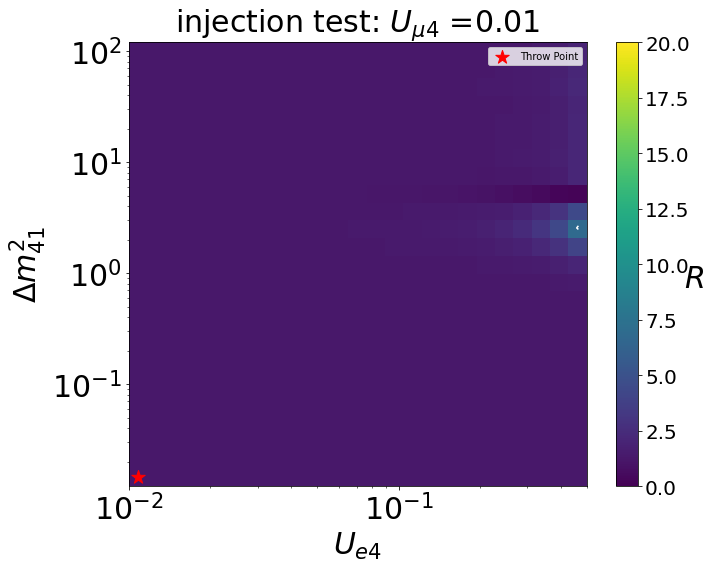

/usr/lib/python3/dist-packages/ipykernel_launcher.py:86: UserWarning: The following kwargs were not used by contour: 'fontsize'


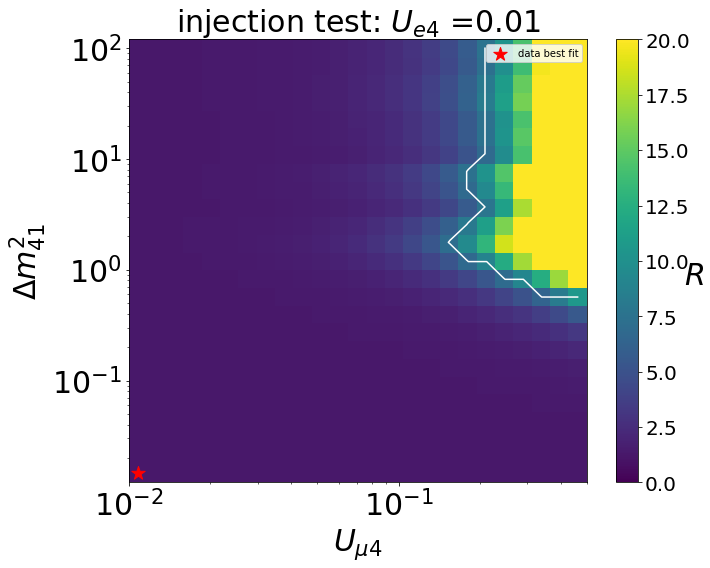

/usr/lib/python3/dist-packages/ipykernel_launcher.py:110: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:110: UserWarning: The following kwargs were not used by contour: 'fontsize'


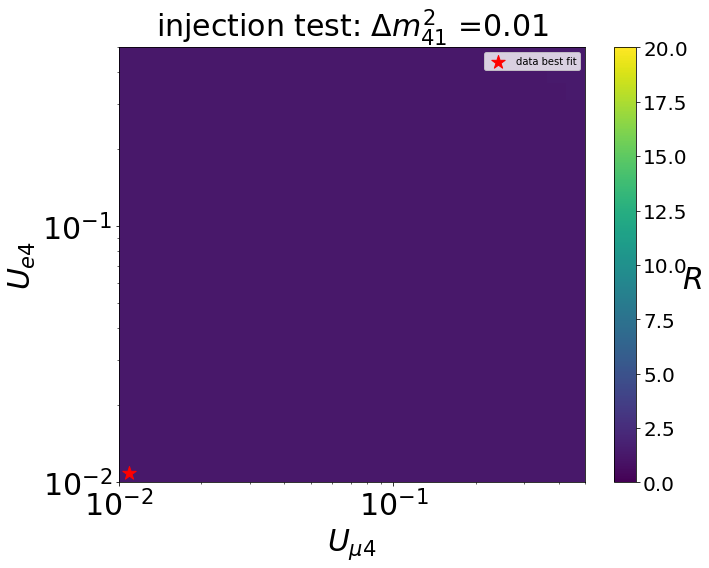

In [9]:
# initialize arr to fill
chi2_arr=[]
chi2_min=[]
filenum=str(i+1)
with open("chis_sig_00000.txt","r") as chis:
    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min = lines[line].split(" ")
        else:
            chi2_arr.append(float(lines[line]))

for i in range(len(chi2_min)):
    chi2_min[i]=float(chi2_min[i])

minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print("grid search min:",minpt,"minimizer min:",chi2_min[0])

# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-chi2_min[0]
    val = chi2_arr[i]
    if (val > 6.25):
        sumex+=1

print("size of excluded region:",sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):
    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]

confidence_arr=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
            if delta < 6.25:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 


# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,0],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,0],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(ue4_center[0],m41_center[0],marker="*",color ="red",label="Throw Point",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{\mu 4}$ ="+"{:.2f}".format(m41_list[0]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_umu4_ptslice_00000.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[0,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[0,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(um4_center[0],m41_center[0],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{e4}$ ="+"{:.2f}".format(m41_list[0]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_ue4_ptslice_00000.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,0,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,0,:],[.9], colors='white',fontsize=20);
plt.scatter(ue4_center[0],um4_center[0],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"injection test: $\Delta m^2_{41}$ ="+"{:.2f}".format(m41_list[0]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_m41_ptslice_00000.p",'wb'))
plt.show()
plt.close()

grid search min: 178.617 minimizer min: 176.774
size of excluded region: 15502 0.992128
19 19 20
[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:64: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


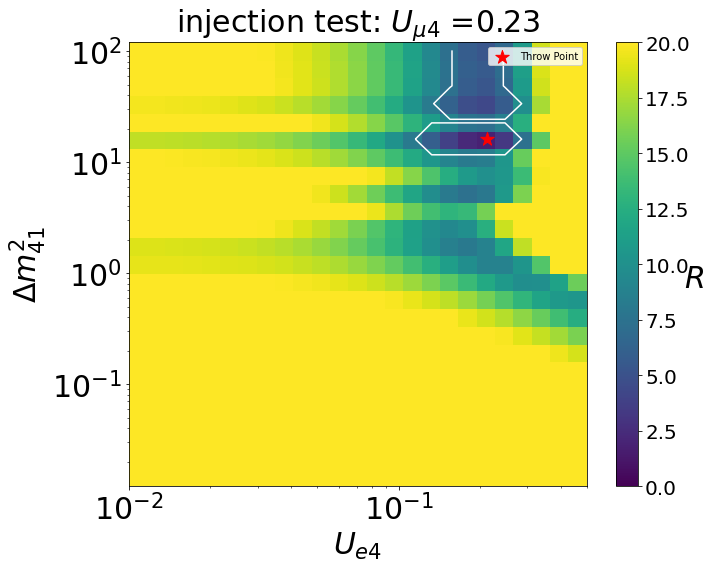

/usr/lib/python3/dist-packages/ipykernel_launcher.py:88: UserWarning: The following kwargs were not used by contour: 'fontsize'


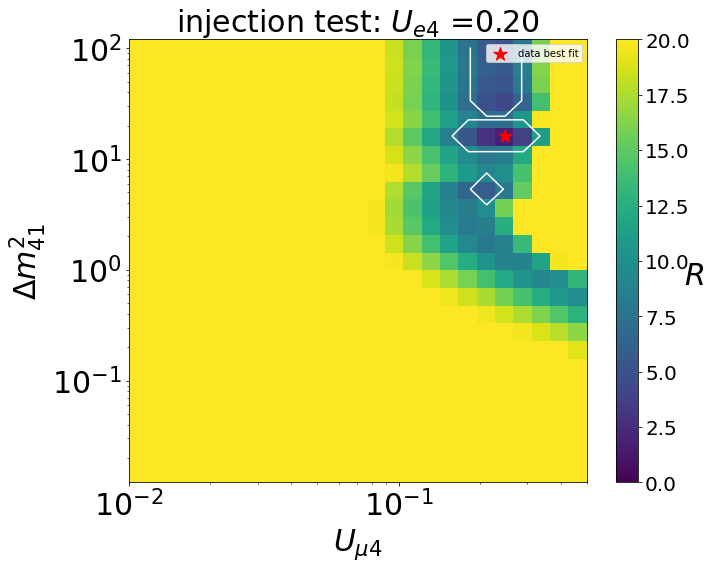

/usr/lib/python3/dist-packages/ipykernel_launcher.py:112: UserWarning: The following kwargs were not used by contour: 'fontsize'


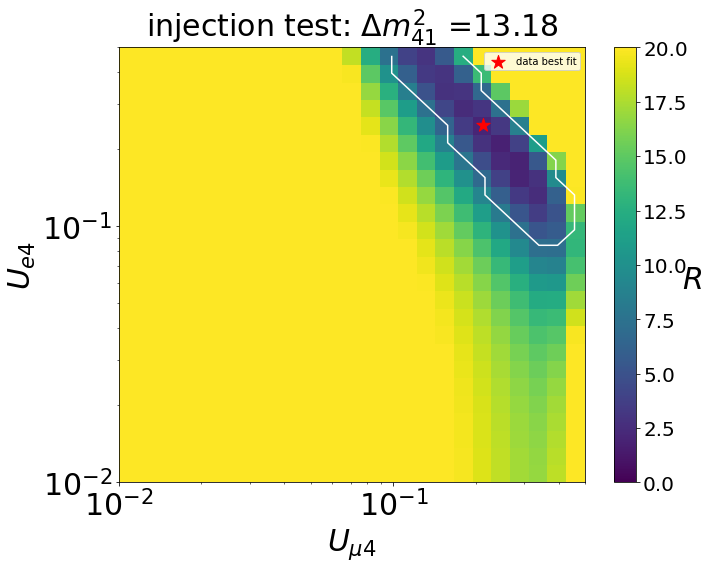

In [10]:
# initialize arr to fill
chi2_arr=[]
chi2_min=[]
with open("chis_sig_12370.txt","r") as chis:
    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min = lines[line].split(" ")
        else:
            chi2_arr.append(float(lines[line]))

for i in range(len(chi2_min)):
    chi2_min[i]=float(chi2_min[i])

minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print("grid search min:",minpt,"minimizer min:",chi2_min[0])

# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-chi2_min[0]
    val = chi2_arr[i]
    if (val > 6.25):
        sumex+=1

print("size of excluded region:",sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):

    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]
    if (pt==12370):
        print(m_id,ue4_id,um4_id)

confidence_arr=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
            if delta < 6.25:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 


# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,20],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,20],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(ue4_center[19],m41_center[19],marker="*",color ="red",label="Throw Point",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{\mu 4}$ ="+"{:.2f}".format(um4_list[20]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_umu4_ptslice_12370.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[19,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[19,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(um4_center[20],m41_center[19],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{e4}$ ="+"{:.2f}".format(ue4_list[19]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_ue4_ptslice_12370.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,19,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,19,:],[.9], colors='white',fontsize=20);
plt.scatter(ue4_center[19],um4_center[20],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"injection test: $\Delta m^2_{41}$ ="+"{:.2f}".format(m41_list[19]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_m41_ptslice_12370.p",'wb'))
plt.show()
plt.close()



grid search min: 195.931 minimizer min: 194.33
size of excluded region: 15622 0.999808
[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:64: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


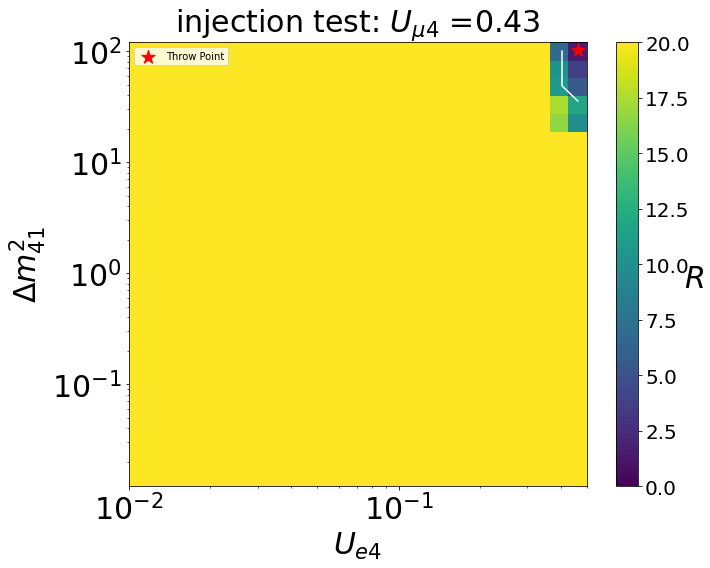

/usr/lib/python3/dist-packages/ipykernel_launcher.py:88: UserWarning: The following kwargs were not used by contour: 'fontsize'


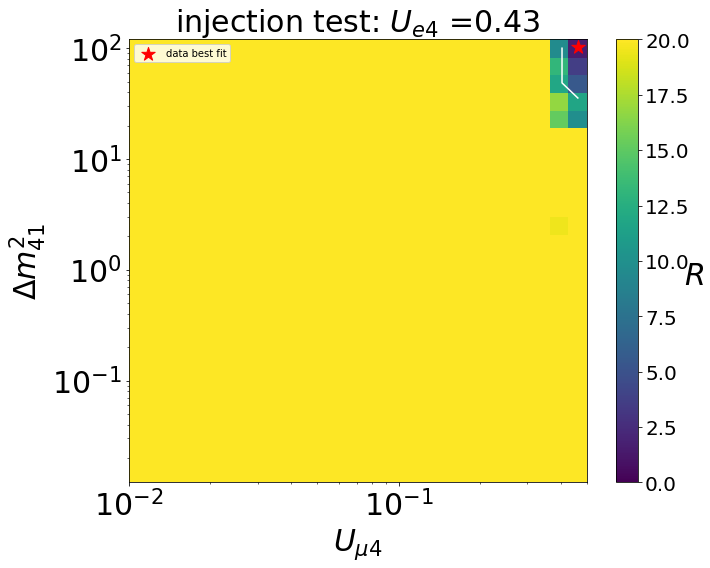

/usr/lib/python3/dist-packages/ipykernel_launcher.py:112: UserWarning: The following kwargs were not used by contour: 'fontsize'


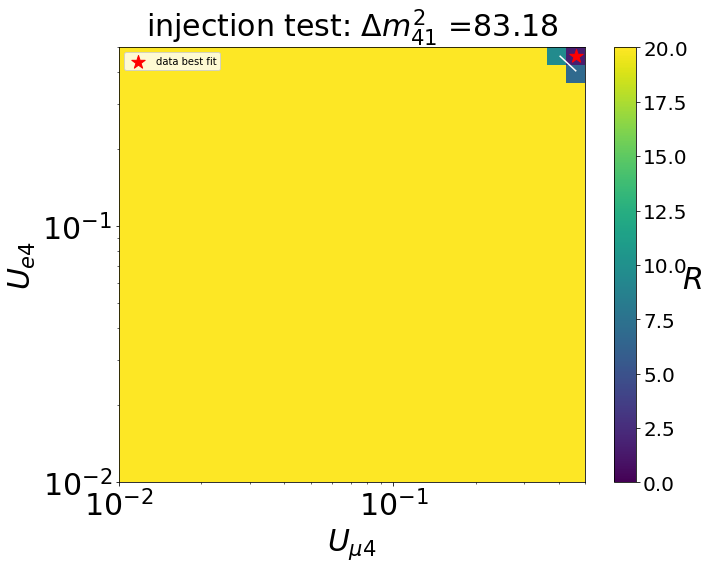

In [11]:
# initialize arr to fill
chi2_arr=[]
chi2_min=[]
filenum=str(i)
with open("chis_sig_15624.txt","r") as chis:
    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min = lines[line].split(" ")
        else:
            chi2_arr.append(float(lines[line]))

for i in range(len(chi2_min)):
    chi2_min[i]=float(chi2_min[i])

minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print("grid search min:",minpt,"minimizer min:",chi2_min[0])

# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-chi2_min[0]
    val = chi2_arr[i]
    if (val > 6.25):
        sumex+=1

print("size of excluded region:",sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):

    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]


confidence_arr=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
            if delta < 6.25:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 


# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,24],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,24],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(ue4_center[24],m41_center[24],marker="*",color ="red",label="Throw Point",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{\mu 4}$ ="+"{:.2f}".format(um4_list[24]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_umu4_ptslice_15624.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[24,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[24,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(um4_center[24],m41_center[24],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{e4}$ ="+"{:.2f}".format(ue4_list[24]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_ue4_ptslice_15624.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,24,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,24,:],[.9], colors='white',fontsize=20);
plt.scatter(ue4_center[24],um4_center[24],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"injection test: $\Delta m^2_{41}$ ="+"{:.2f}".format(m41_list[24]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_m41_ptslice_15624.p",'wb'))
plt.show()
plt.close()

grid search min: 170.522 minimizer min: 170.133
size of excluded region: 1489 0.095296
4 4 5
[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


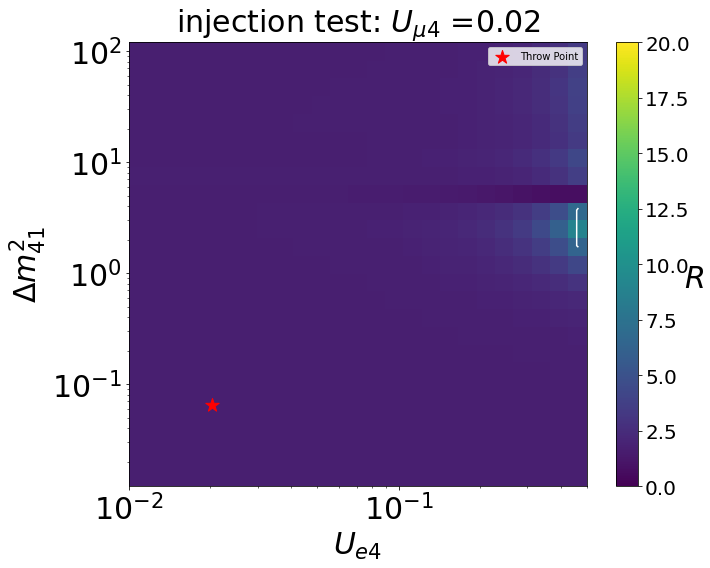

/usr/lib/python3/dist-packages/ipykernel_launcher.py:89: UserWarning: The following kwargs were not used by contour: 'fontsize'


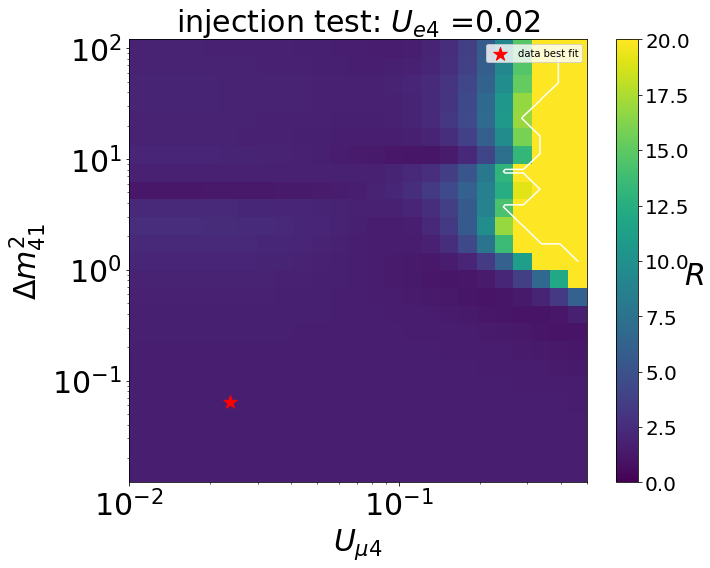

/usr/lib/python3/dist-packages/ipykernel_launcher.py:113: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:113: UserWarning: The following kwargs were not used by contour: 'fontsize'


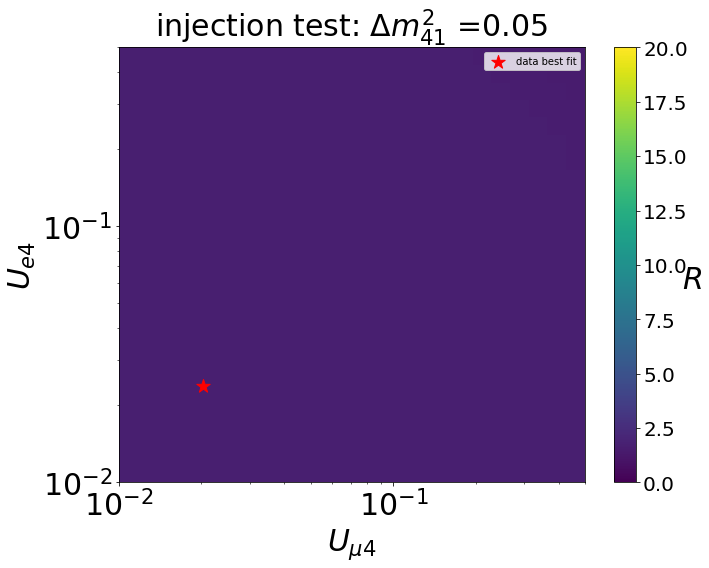

In [12]:
# initialize arr to fill
chi2_arr=[]
chi2_min=[]
filenum=str(i+1)
with open("chis_sig_02605.txt","r") as chis:
    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min = lines[line].split(" ")
        else:
            chi2_arr.append(float(lines[line]))

for i in range(len(chi2_min)):
    chi2_min[i]=float(chi2_min[i])

minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print("grid search min:",minpt,"minimizer min:",chi2_min[0])

# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-chi2_min[0]
    val = chi2_arr[i]
    if (val > 6.25):
        sumex+=1

print("size of excluded region:",sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):

    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]
    if (pt==2605):
        print(m_id,ue4_id,um4_id)

confidence_arr=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
            if delta < 6.25:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 


# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,5],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,5],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(ue4_center[4],m41_center[4],marker="*",color ="red",label="Throw Point",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{\mu 4}$ ="+"{:.2f}".format(um4_list[5]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_umu4_ptslice_02605.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[19,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[4,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(um4_center[5],m41_center[4],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{e4}$ ="+"{:.2f}".format(ue4_list[4]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_ue4_ptslice_02605.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,4,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,4,:],[.9], colors='white',fontsize=20);
plt.scatter(ue4_center[4],um4_center[5],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"injection test: $\Delta m^2_{41}$ ="+"{:.2f}".format(m41_list[4]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_m41_ptslice_02605.p",'wb'))
plt.show()
plt.close()



grid search min: 159.142 minimizer min: 159.142
size of excluded region: 2767 0.177088
9 9 10
[0.01, 0.0116939, 0.0136747, 0.015991, 0.0186997, 0.0218672, 0.0255713, 0.0299028, 0.034968, 0.0408911, 0.0478176, 0.0559174, 0.0653891, 0.0764653, 0.0894176, 0.104564, 0.122276, 0.142988, 0.167209, 0.195532, 0.228653, 0.267384, 0.312675, 0.365639, 0.427574, 0.5]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:65: UserWarning: No contour levels were found within the data range.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:65: UserWarning: The following kwargs were not used by contour: 'fontsize', 'label'


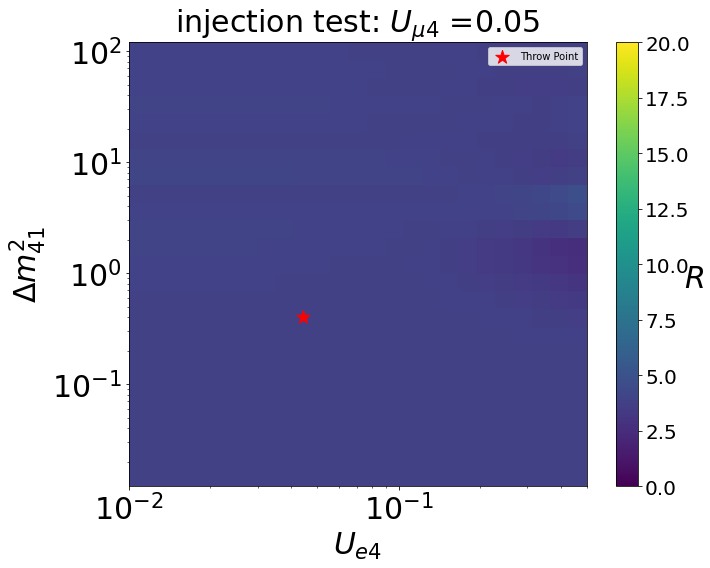

/usr/lib/python3/dist-packages/ipykernel_launcher.py:89: UserWarning: The following kwargs were not used by contour: 'fontsize'


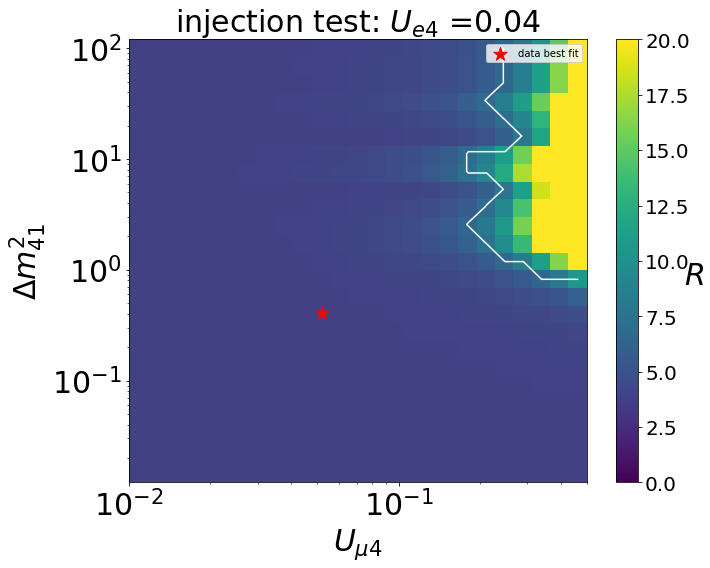

/usr/lib/python3/dist-packages/ipykernel_launcher.py:113: UserWarning: The following kwargs were not used by contour: 'fontsize'


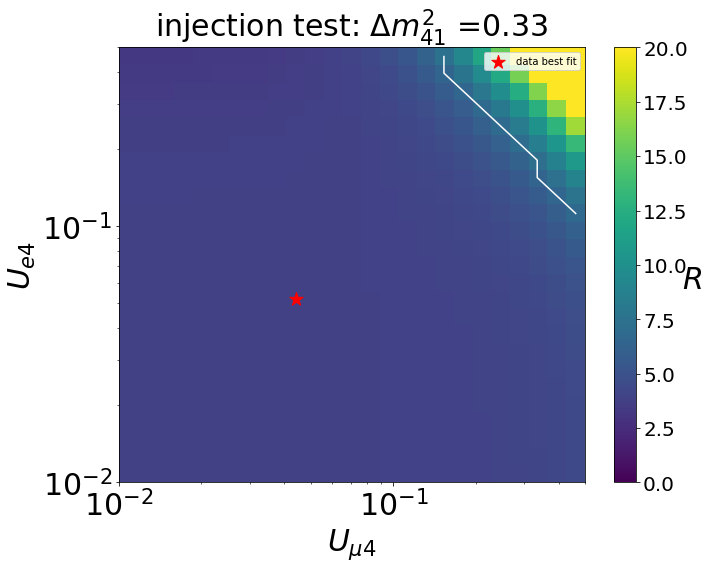

In [13]:
# initialize arr to fill
chi2_arr=[]
chi2_min=[]
filenum=str(i+1)
with open("chis_sig_05860.txt","r") as chis:
    lines = chis.readlines()
    for line in range(len(lines)):
        if line==len(lines)-1:
            chi2_min = lines[line].split(" ")
        else:
            chi2_arr.append(float(lines[line]))

for i in range(len(chi2_min)):
    chi2_min[i]=float(chi2_min[i])

minpt =1000000
for pt in range(len(chi2_arr)):
    if chi2_arr[pt]<minpt: 
        minpt = chi2_arr[pt]
print("grid search min:",minpt,"minimizer min:",chi2_min[0])

# change chi2 arr to 25x25x25 for 3d plot
chi_arr_sens=np.zeros((25,25,25))
sumex=0
for i in range(len(chi2_arr)):
    chi2_arr[i]=chi2_arr[i]-chi2_min[0]
    val = chi2_arr[i]
    if (val > 6.25):
        sumex+=1

print("size of excluded region:",sumex,float(sumex)/float(len(chi2_arr)))

for pt in range(len(chi2_arr)):

    #this is a mess, but works. Didn't want to hardcode any numbers
    m_id = math.floor(pt/((25*25)))
    # need the subtraction term so that it resets everytime m41 increases
    ue4_id = math.floor((pt-m_id*25*25)/(25))
    um4_id = pt % (25)
#     print(pt,m_id,ue4_id,um4_id)
    chi_arr_sens[ue4_id][m_id][um4_id]=chi2_arr[pt]
    if (pt==5860):
        print(m_id,ue4_id,um4_id)

confidence_arr=np.copy(chi_arr_sens)
for i in range(25):
    for j in range(25):
        for k in range(25):
            delta=chi_arr_sens[i][j][k]
            if delta < 6.25:
                confidence_arr[i][j][k] = 0
            else:
                confidence_arr[i][j][k] = 1 


# at umu4: 
print(ue4_list)
y,x = np.meshgrid(m41_list, ue4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,:,10],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x = np.meshgrid(m41_center, ue4_center)
contours = plt.contour(x, y, confidence_arr[:,:,10],[.9], colors='white',fontsize=20,label="wilks 90% CL")
plt.scatter(ue4_center[9],m41_center[9],marker="*",color ="red",label="Throw Point",s=200)
plt.xlabel(r"$U_{e4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{\mu 4}$ ="+"{:.2f}".format(um4_list[10]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_umu4_ptslice_05860.p",'wb'))
plt.show()
plt.close()

# at ue4
y,x = np.meshgrid(m41_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[9,:,:].transpose(),norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
y,x= np.meshgrid(m41_center, um4_center)
contours = plt.contour(x, y, confidence_arr[9,:,:].transpose(),[.9], colors='white',fontsize=20)
plt.scatter(um4_center[10],m41_center[9],marker="*",color ="red",label="data best fit",s=200)
plt.xlabel(r"$U_{\mu 4}$",fontsize=30)
plt.ylabel(r"$\Delta m^2_{41}$",fontsize=30)
plt.title(r"injection test: $U_{e4}$ ="+"{:.2f}".format(ue4_list[9]),fontsize=30)
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_ue4_ptslice_05860.p",'wb'))
plt.show()
plt.close()


x,y = np.meshgrid(ue4_list, um4_list)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, chi_arr_sens[:,9,:],norm=colors.Normalize(vmin=1e-13, vmax=20))
cbar = plt.colorbar()
cbar.set_label(r'$R$',rotation=0,fontsize=30)
#contour plots
x,y = np.meshgrid(ue4_center, um4_center)
contours = plt.contour(x, y, confidence_arr[:,9,:],[.9], colors='white',fontsize=20);
plt.scatter(ue4_center[9],um4_center[10],marker="*",color ="red",label="data best fit",s=200)
plt.ylabel(r"$U_{e4}$",fontsize=30)
plt.xlabel(r"$U_{\mu4}$",fontsize=30)
plt.title(r"injection test: $\Delta m^2_{41}$ ="+"{:.2f}".format(m41_list[9]),fontsize=30)
plt.yscale("log")
plt.xscale("log")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
cbar.ax.tick_params(labelsize=20)
plt.legend()
plt.tight_layout()
pkl.dump(fig,open("siginject_m41_ptslice_05860.p",'wb'))
plt.show()
plt.close()

